In [3]:
pip install networkx

  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


/var/folders/cb/jpwyvv8n5m32mkslsl8n1h0c0000gn/T/ipykernel_1507/2964955833.py:52: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(x)


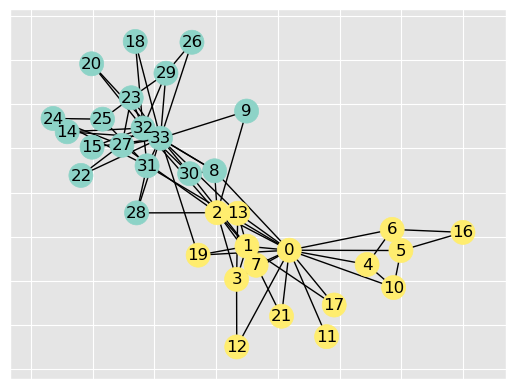

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import linalg

#k-meansクラスタリング
class KMeans:
    def __init__(self, n_cluster=2, max_iter=300):
        self.n_cluster = n_cluster
        self.max_iter = max_iter

    def clustering(self, x):
        self.vector = x
        self.clusters = np.random.randint(0, self.n_cluster, x.shape[0])
        for _ in range(self.max_iter):
            centroids = np.array([self.vector[self.clusters == n, :].mean(axis=0) for n in range(self.n_cluster)])

            new_clusters = np.array([np.linalg.norm(self.vector - c, axis=1) for c in centroids]).argmin(axis=0)

            for n in range(self.n_cluster):
                if not np.any(new_clusters == n):
                    centroids[n] = self.vector[np.random.choice(self.vector.shape[0], 1), :]

            if np.allclose(self.clusters, new_clusters):
                break

            self.clusters = new_clusters

    def plot_cluster(self):
        plt.style.use('ggplot')
        plt.scatter(self.vector[self.clusters == 0, 0], self.vector[self.clusters == 0, 1], c='red')
        plt.scatter(self.vector[self.clusters == 1, 0], self.vector[self.clusters == 1, 1], c='blue')
        plt.show()

#スペクトラルクラスタリング(クラスタリングクラスを継承)
class SpectralClustering(KMeans):
    def __init__(self, graph, n_components=3, n_cluster=2, max_iter=300):
        super(SpectralClustering, self).__init__(n_cluster, max_iter)#クラスタ数と最大回数を継承
        self.Laplacian = self.build_laplacian(graph)
        self.graph = graph
        self.n_components = n_components

    def __call__(self, *args, **kwargs):
        eign_value, eign_vector = np.linalg.eig(self.Laplacian)

        vecs = eign_vector[:, np.argsort(eign_value)]
        vals = eign_value[np.argsort(eign_value)]
        self.clustering(vecs[:, 0:self.n_components])
        self.plot_cluster()

    def build_laplacian(self, x):
        adj = nx.adjacency_matrix(x)
        adj = adj.toarray()
        d = np.diag(np.sum(adj, axis=0))
        l_norm = np.dot(np.sqrt(linalg.inv(d)), np.dot((d - adj), np.sqrt(linalg.inv(d))))
        return l_norm

    def plot_cluster(self):
        plt.style.use('ggplot')
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx(self.graph, pos=pos, node_color=self.clusters, cmap=plt.cm.Set3)
        

        plt.show()


def main():
    G = nx.karate_club_graph()

    model = SpectralClustering(G, n_components=2, n_cluster=2, max_iter=800)
    model()


if __name__ == "__main__":
    main()